# Machine Learning Project

## Introduction

After taking the Data Science course from BrainStation, I learned how powerful python and its libraries in data analysis, prediction and visualization. In order to strengen my skills in algorithm and pipeline development, I decided to take a step further to continue and deep dive into Machine Learning. 

Currently I am at the 3rd week of the course and planning on my project, it took me a while to decide a topic as I tried to avoid applying repetitive skills I mastered in Data Science course. Throughout readings I learned that there are various stages of Data Science and Machine Learning:

 - Data collection
 - Data sorting
 - Data analysis
 - Algorithm development
 - Apply and optimize algorithm
 - Utilize the results geneterated from the algorithm to provide insights and further conclusions

In order to apply all the above skills and use all sort of machine learning APIs more extensively including sci-kit learn, TensorFlow and Keras to build an algorithm and pipeline, and I will deploy the ML model to real-time data in Google Cloud Platform. I have done research and read feedback on suggested projects for ML beginners, and decided to proceed with analyzing True and Fake news based on Natural Language Tools. Data was taken from Kaggle and the project is in progress. I will constantly upload the noteboook for updates, so stay tuned!

## Data Collection

**Data Source:** Data is collected from Kaggle https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

There are 2 sets of data - **True.csv** and **Fake.csv**, which consists of ~20,000 and ~18,000 articles, respectively. Each dataset contains the following information:

 - Article Title
 - Article Test
 - Article Subject
 - Article published date

Data was cleaned and uploaded to Kaggle by the creator prior to downloading for analysis 

## Import Libraries and Data

In [117]:
# import libraries
# more libraries will be imported as I go

# libraries for data processing and data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

%matplotlib inline

# visual representation of text data
from wordcloud import WordCloud, STOPWORDS

# Natural Language Processing Tool Kit Imports
# Importing Natural Language ToolKit and its essential packages
import nltk

# Removing stopwords
from nltk.corpus import stopwords 

# Stemming and Lemmatizing words in the dataframe
# https://medium.com/analytics-vidhya/building-a-simple-chatbot-in-python-using-nltk-7c8c8215ac6e
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Text Cleaning
# Importing string for cleaning string, punctuations, numbers
import string

# Vectorizing Imports
# Importing CountVectorizer to tokenize our articles
# https://towardsdatascience.com/feature-extraction-techniques-d619b56e31be
from sklearn import feature_selection
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# libraries for machine learning
# Importing Scaler for Standardizing Data
from sklearn.preprocessing import StandardScaler

# Train and Test splits prior to data modelling
from sklearn.model_selection import train_test_split

# Importing the different models for modelling purposes
# Supervised ML
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.svm import LinearSVC #Linear SVM
from sklearn.svm import SVC #Kernal SVM
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Unsupervised ML
from sklearn import cluster #Kmeans clustering
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA #PCA
from sklearn.manifold import TSNE #tSNE
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.ensemble import AdaBoostClassifier

# Model Scoring and Validation
from sklearn import metrics # Metrics for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# For saving models
import joblib

In [118]:
# import data
true = pd.read_csv('data/True.csv')
true.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [119]:
fake = pd.read_csv('data/Fake.csv')
fake.tail()

,title,text,subject,date
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


## Exploratory data analysis

#### Create a copy of both DataFrames to avoid changes of the original DataFrames, followed by exploring DataFrames details

In [120]:
df_true = true.copy()

In [121]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [122]:
df_true.nunique()

title      20826
text       21192
subject        2
date         716
dtype: int64

In [123]:
df_true['subject'].unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [124]:
df_fake = fake.copy()

In [125]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [126]:
df_fake.nunique()

title      17903
text       17455
subject        6
date        1681
dtype: int64

In [127]:
df_fake['subject'].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

#### Data cleanup on the subject column to make it more readible and for consistency

In [128]:
# change the content in subject column for consistency: create dictionary and assign to the column

# For Ture News
true_subject_clean = {'politicsNews' : 'Political News',
                        'worldnews' : 'World News'}

df_true['subject'] = df_true['subject'].map(true_subject_clean)

# For Fake News
fake_subject_clean = {'politics' : 'Political News',
                        'Government News' : 'Government News',
                        'News' : 'News',
                        'left-news' : 'Left News',
                        'US_News' : 'US News',
                        'Middle-east' : 'Middle Eastern News'}

df_fake['subject'] = df_fake['subject'].map(fake_subject_clean)

#### Data cleanup to check duplicates and drop if any

In [129]:
df_true.duplicated().sum()

206

In [ ]:
df_true.drop_duplicates()

In [130]:
df_fake.duplicated().sum()

3

In [ ]:
df_fake.drop_duplicates()

#### Add "category" to True and Fake DataFrame, this will be used for categorization and classification in data modelling

In [131]:
# add new column "label", True will be 1, and Fake will be 0

df_true['category'] = 1
df_fake['category'] = 0

In [132]:
data_true = df_true.copy()
data_fake = df_fake.copy()

In [133]:
data_true['True/Fake'] = 'True'
data_fake['True/Fake'] = 'Fake'

In [134]:
data_true.head()

,title,text,subject,date,category,True/Fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,Political News,"December 31, 2017",1,True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,Political News,"December 29, 2017",1,True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,Political News,"December 31, 2017",1,True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,Political News,"December 30, 2017",1,True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,Political News,"December 29, 2017",1,True


In [135]:
data_fake.head()

,title,text,subject,date,category,True/Fake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,Fake


In [136]:
# concat and create a new DataFrame for both df_true and df_fake

df_tf = pd.concat([data_true, data_fake])
df_tf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      44898 non-null  object
 1   text       44898 non-null  object
 2   subject    44898 non-null  object
 3   date       44898 non-null  object
 4   category   44898 non-null  int64 
 5   True/Fake  44898 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.4+ MB


In [137]:
df_tf.head()

,title,text,subject,date,category,True/Fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,Political News,"December 31, 2017",1,True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,Political News,"December 29, 2017",1,True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,Political News,"December 31, 2017",1,True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,Political News,"December 30, 2017",1,True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,Political News,"December 29, 2017",1,True


In [138]:
df_tf.category.value_counts()

0    23481
1    21417
Name: category, dtype: int64

(0.0, 25000.0)

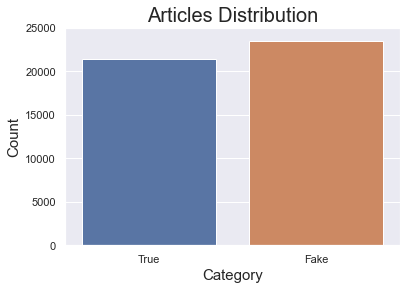

In [139]:
# To check if there is imbalance data for both True and Fake new data sets
# This is to ensure data are well balacned to avoid skewing analysis and algorithm training
sns.countplot(x='True/Fake', data=df_tf)#color='#597FE7')
plt.title('Articles Distribution',fontsize = 20)
plt.xlabel('Category',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.ylim([0, 25000])

In [140]:
df_tf.subject.value_counts()

Political News         18113
World News             10145
News                    9050
Left News               4459
Government News         1570
US News                  783
Middle Eastern News      778
Name: subject, dtype: int64

In [141]:
df_true.subject.value_counts()

Political News    11272
World News        10145
Name: subject, dtype: int64

In [142]:
df_fake.subject.value_counts()

News                   9050
Political News         6841
Left News              4459
Government News        1570
US News                 783
Middle Eastern News     778
Name: subject, dtype: int64

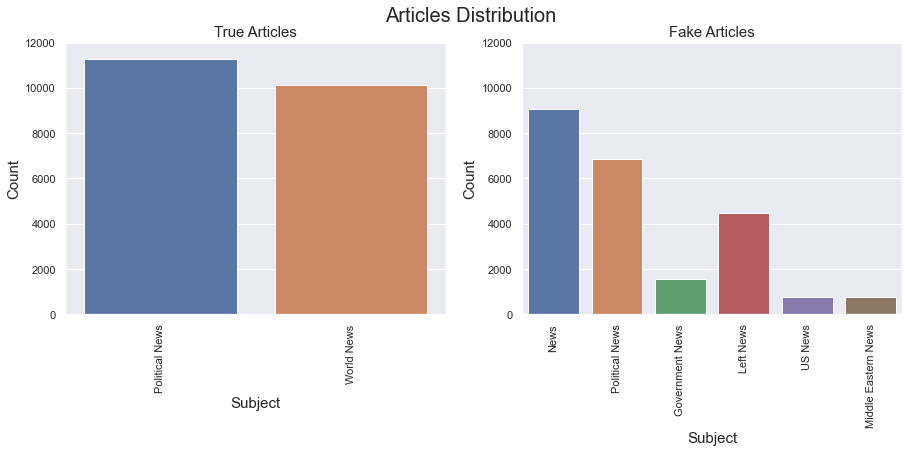

In [143]:
plt.subplots(1,2, figsize = (15,5))
plt.suptitle('Articles Distribution', fontsize = 20)

plt.subplot(1,2,1)
sns.countplot(x='subject', data=df_true) #color='#597FE7')
plt.title('True Articles',fontsize = 15)
plt.xlabel('Subject',fontsize = 15)
plt.xticks(rotation='90')
plt.ylabel('Count',fontsize = 15)
plt.ylim([0, 12000])

plt.subplot(1,2,2)
sns.countplot(x='subject', data=df_fake) #color='#597FE7')
plt.title('Fake Articles',fontsize = 15)
plt.xlabel('Subject',fontsize = 15)
plt.xticks(rotation='90')
plt.ylabel('Count',fontsize = 15)
plt.ylim([0, 12000]);


## Data Pre-processing with NLTK for text cleaning (Natural Language Tools)

**Uppercase and Lowercase conversion**

It is to convert the entire text to either lowercase or uppercase to unify the same words or phrases. This step will help the algorithm to treat the same words in different cases as different.

**Tokenization**
This is a process to convert normal text strings into a list of tokens. Sentence tokenizer can be used to find the list of sentences and Word tokenizer can be used to find the list of words in strings.

**Stopwords**

Stopwords are the English words which does not add much meaning to a sentence, and that they can be filtered without sacrificing the meaning of the original sentences. Words or punctuation such as 'the', 'he' or 'have' will be excluded. This step is usually done before or after processing of natural language data

**Stemming**

**Lemmatization**

For more information can look at this article: https://medium.com/analytics-vidhya/building-a-simple-chatbot-in-python-using-nltk-7c8c8215ac6e

**WordCloud**

Word Cloud is a data visualization tool to represent the word frequency and importance based on the font size - it is a technique commonly used for analyzing text data from social media websites.

I used the following website to assist me in setting the syntax: https://www.geeksforgeeks.org/generating-word-cloud-python/

**To get a better sense of the common words that were seen or used in the News title and text**

note that I would like to do a WordCloud analysis of text as well, however it was computational heavy and I had a hard time running

In [144]:
# Uppercase and Lowercase conversion
# I will do a word count for column[text] to both True and Fake DataFrames

# Step 1 - Removing all punctuations
# Source: https://stackoverflow.com/questions/265960/best-way-to-strip-punctuation-from-a-string
df_true['text'] = df_true['text'].str.translate(str.maketrans('', '', string.punctuation))
df_fake['text'] = df_fake['text'].str.translate(str.maketrans('', '', string.punctuation))

# Step 2 - Removing all numbers
# Source: https://stackoverflow.com/questions/12851791/removing-numbers-from-string/12856384#12856384
df_true['text'] = df_true['text'].str.translate(str.maketrans('', '', string.digits))
df_fake['text'] = df_fake['text'].str.translate(str.maketrans('', '', string.digits))

# Step 3 - Converting all texts to lowercase
df_true['text'] = df_true['text'].str.lower()
df_fake['text'] = df_fake['text'].str.lower()

In [145]:
# Revisit Uppercase and Lowercase conversion
# I will also create a WordCloud for column[title] to both True and Fake DataFrames

# Step 1 - Removing all punctuations
df_true['title'] = df_true['title'].str.translate(str.maketrans('', '', string.punctuation))
df_fake['title'] = df_fake['title'].str.translate(str.maketrans('', '', string.punctuation))

# Step 2 - Removing all numbers
df_true['title'] = df_true['title'].str.translate(str.maketrans('', '', string.digits))
df_fake['title'] = df_fake['title'].str.translate(str.maketrans('', '', string.digits))

# Step 3 - Converting all texts to lowercase
df_true['title'] = df_true['title'].str.lower()
df_fake['title'] = df_fake['title'].str.lower()

In [146]:
# check DataFrame to ensure text are processed before proceeding to the next step
df_true.head()

,title,text,subject,date,category
0,as us budget fight looms republicans flip thei...,washington reuters the head of a conservative...,Political News,"December 31, 2017",1
1,us military to accept transgender recruits on ...,washington reuters transgender people will be...,Political News,"December 29, 2017",1
2,senior us republican senator let mr mueller do...,washington reuters the special counsel invest...,Political News,"December 31, 2017",1
3,fbi russia probe helped by australian diplomat...,washington reuters trump campaign adviser geo...,Political News,"December 30, 2017",1
4,trump wants postal service to charge much more...,seattlewashington reuters president donald tr...,Political News,"December 29, 2017",1


In [147]:
# check DataFrame to ensure text are processed before proceeding to the next step
df_fake.head()

,title,text,subject,date,category
0,donald trump sends out embarrassing new year’...,donald trump just couldn t wish all americans ...,News,"December 31, 2017",0
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",0
2,sheriff david clarke becomes an internet joke...,on friday it was revealed that former milwauke...,News,"December 30, 2017",0
3,trump is so obsessed he even has obama’s name...,on christmas day donald trump announced that h...,News,"December 29, 2017",0
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,News,"December 25, 2017",0


In [148]:
# Confirmed changes were made in both DataFrames, next step is to do a word count for 'Title' and 'Text'
# This will help us to understand the # words would represent an article could be true or fake

# Total words in the 'title' column in True articles 
df_true['Title Word Count'] = df_true['title'].apply(lambda x: len(x.split(' ')))

# Total words in the 'text' column in True articles 
df_true['Text Word Count'] = df_true['text'].apply(lambda x: len(x.split(' ')))

# Total words in the 'title' column in Fake articles 
df_fake['Title Word Count'] = df_fake['title'].apply(lambda x: len(x.split(' ')))

# Total words in the 'text' column in Fake articles 
df_fake['Text Word Count'] = df_fake['text'].apply(lambda x: len(x.split(' ')))


In [149]:
# Check DataFrame to ensure new columns are added
df_true.head()

,title,text,subject,date,category,Title Word Count,Text Word Count
0,as us budget fight looms republicans flip thei...,washington reuters the head of a conservative...,Political News,"December 31, 2017",1,10,753
1,us military to accept transgender recruits on ...,washington reuters transgender people will be...,Political News,"December 29, 2017",1,9,625
2,senior us republican senator let mr mueller do...,washington reuters the special counsel invest...,Political News,"December 31, 2017",1,10,466
3,fbi russia probe helped by australian diplomat...,washington reuters trump campaign adviser geo...,Political News,"December 30, 2017",1,9,377
4,trump wants postal service to charge much more...,seattlewashington reuters president donald tr...,Political News,"December 29, 2017",1,11,864


In [150]:
# Check DataFrame to ensure new columns are added
df_fake.head()

,title,text,subject,date,category,Title Word Count,Text Word Count
0,donald trump sends out embarrassing new year’...,donald trump just couldn t wish all americans ...,News,"December 31, 2017",0,13,516
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",0,9,309
2,sheriff david clarke becomes an internet joke...,on friday it was revealed that former milwauke...,News,"December 30, 2017",0,16,600
3,trump is so obsessed he even has obama’s name...,on christmas day donald trump announced that h...,News,"December 29, 2017",0,15,475
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,News,"December 25, 2017",0,12,434


In [151]:
df_true.describe()

,category,Title Word Count,Text Word Count
count,21417.0,21417.000000,21417.000000
mean,1.0,9.958864,394.406593
std,0.0,1.702477,281.062335
min,1.0,4.000000,2.000000
25%,1.0,9.000000,153.000000
50%,1.0,10.000000,367.000000
75%,1.0,11.000000,537.000000
max,1.0,20.000000,5175.000000


In [152]:
df_fake.describe()

,category,Title Word Count,Text Word Count
count,23481.0,23481.000000,23481.000000
mean,0.0,15.118436,435.237213
std,0.0,4.233021,420.998745
min,0.0,1.000000,1.000000
25%,0.0,12.000000,246.000000
50%,0.0,15.000000,373.000000
75%,0.0,17.000000,519.000000
max,0.0,45.000000,8436.000000


In [153]:
# Print a summary for word counts we just performed
# Summary includes sum, mean, max and min
# https://realpython.com/python-print/
print()
print('----------- Summary -----------')
print()
print('Word count for Title column:')
print('----------------------------')
print(f"Sum wordcount of true articles titles: {df_true['Title Word Count'].sum()}") 
print(f"Sum wordcount of fake articles titles: {df_fake['Title Word Count'].sum()}") 
print()
print(f"Mean wordcount of true article titles: {df_true['Title Word Count'].mean()}")
print(f"Mean wordcount of fake articles titles: {df_fake['Title Word Count'].mean()}")
print()
print(f"Max wordcount of true article titles: {df_true['Title Word Count'].max()}")
print(f"Max wordcount of fake articles titles: {df_fake['Title Word Count'].max()}")
print()
print(f"Min wordcount of true article titles: {df_true['Title Word Count'].min()}")
print(f"Min wordcount of fake articles titles: {df_fake['Title Word Count'].min()}")
print()
print('Word count for Text column:')
print('----------------------------')
print(f"Sum wordcount of true articles titles: {df_true['Text Word Count'].sum()}") 
print(f"Sum wordcount of fake articles titles: {df_fake['Text Word Count'].sum()}") 
print()
print(f"Mean wordcount of true article titles: {df_true['Text Word Count'].mean()}")
print(f"Mean wordcount of fake articles titles: {df_fake['Text Word Count'].mean()}")
print()
print(f"Max wordcount of true article titles: {df_true['Text Word Count'].max()}")
print(f"Max wordcount of fake articles titles: {df_fake['Text Word Count'].max()}")
print()
print(f"Min wordcount of true article titles: {df_true['Text Word Count'].min()}")
print(f"Min wordcount of fake articles titles: {df_fake['Text Word Count'].min()}")
print()


----------- Summary -----------

Word count for Title column:
----------------------------
Sum wordcount of true articles titles: 213289
Sum wordcount of fake articles titles: 354996

Mean wordcount of true article titles: 9.958864453471541
Mean wordcount of fake articles titles: 15.11843618244538

Max wordcount of true article titles: 20
Max wordcount of fake articles titles: 45

Min wordcount of true article titles: 4
Min wordcount of fake articles titles: 1

Word count for Text column:
----------------------------
Sum wordcount of true articles titles: 8447006
Sum wordcount of fake articles titles: 10219805

Mean wordcount of true article titles: 394.4065928934958
Mean wordcount of fake articles titles: 435.23721306588305

Max wordcount of true article titles: 5175
Max wordcount of fake articles titles: 8436

Min wordcount of true article titles: 2
Min wordcount of fake articles titles: 1



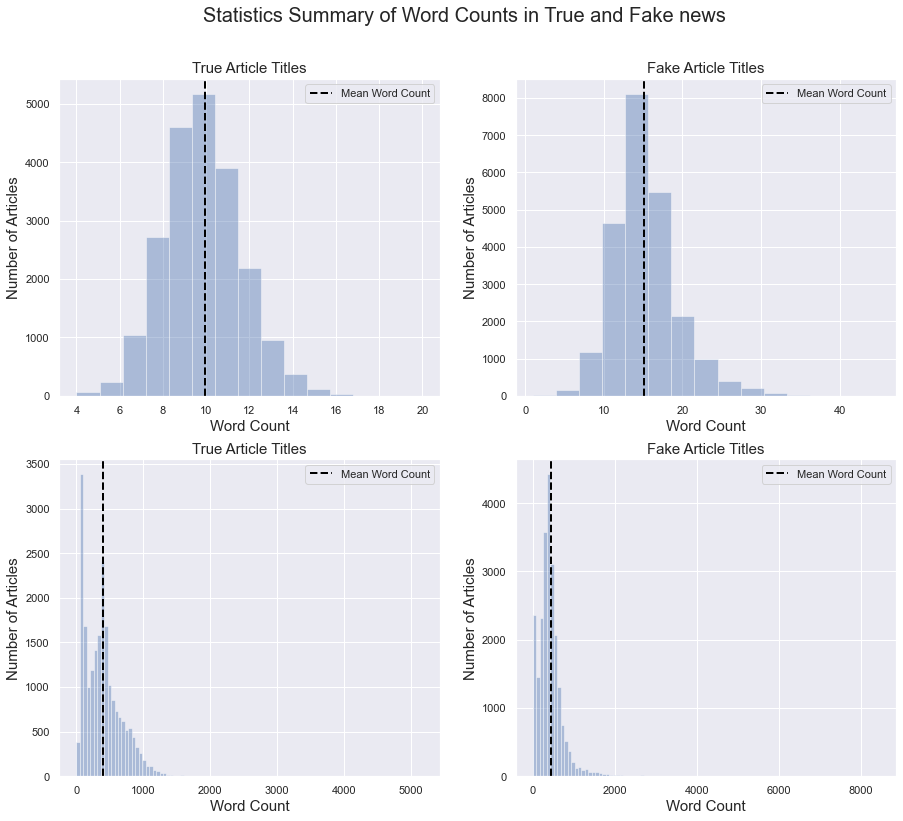

In [154]:
# Next step is to construct graphs using the above data for better visualization
plt.subplots(2,2, figsize = (15,12.5))
plt.subplots_adjust(top = 0.9)
plt.suptitle('Statistics Summary of Word Counts in True and Fake news', fontsize = 20)

# Plot graph for True Article title word count
plt.subplot(2,2,1)
sns.distplot(df_true['Title Word Count'], bins = 15, kde=False)
plt.title('True Article Titles',fontsize = 15)
plt.xlabel('Word Count',fontsize = 15)
plt.ylabel('Number of Articles',fontsize = 15)
plt.axvline(x=df_true['Title Word Count'].mean(),
            linewidth = 2,
            linestyle = '--',
            color = 'black', label = 'Mean Word Count')
plt.legend()

# Plot graph for False Article title word count
plt.subplot(2,2,2)
sns.distplot(df_fake['Title Word Count'], bins = 15, kde=False)
plt.title('Fake Article Titles',fontsize = 15)
plt.xlabel('Word Count',fontsize = 15)
plt.ylabel('Number of Articles',fontsize = 15)
plt.axvline(x=df_fake['Title Word Count'].mean(),
            linewidth = 2,
            linestyle = '--',
            color = 'black', label = 'Mean Word Count')
plt.legend()

# Plot graph for True Article Text word count
plt.subplot(2,2,3)
sns.distplot(df_true['Text Word Count'], bins = 100, kde=False)
plt.title('True Article Titles',fontsize = 15)
plt.xlabel('Word Count',fontsize = 15)
plt.ylabel('Number of Articles',fontsize = 15)
plt.axvline(x=df_true['Text Word Count'].mean(),
            linewidth = 2,
            linestyle = '--',
            color = 'black', label = 'Mean Word Count')
plt.legend()

# Plot graph for True Article Text word count
plt.subplot(2,2,4)
sns.distplot(df_fake['Text Word Count'], bins = 100, kde=False)
plt.title('Fake Article Titles',fontsize = 15)
plt.xlabel('Word Count',fontsize = 15)
plt.ylabel('Number of Articles',fontsize = 15)
plt.axvline(x=df_fake['Text Word Count'].mean(),
            linewidth = 2,
            linestyle = '--',
            color = 'black', label = 'Mean Word Count')
plt.legend();

In [39]:
#Based of the summary table and distribution graphs, majority of new articles
#Some lengthy articles could skewed the results for further algorithm development, therefore I need to set a threshold and eliminate some data
#tested 2500, 3000 and 3500 to find an optimal threshold

In [155]:
# Set threshold to drop articles that skewed the analysis for True Articles

print('Total articles that have words>2500 the text column:')
print(len(df_true[df_true['Text Word Count'] > 2500]))
print()

# Printing out the propotion to see how much of our data is outside of our distributions
print('Percent of true articles will be elimiated:')
print(len(df_true[df_true['Text Word Count'] > 2500]) / len(df_true)*100)
print()

# Checking for all rows where Text Word Count is over 3000 
#print("The rows that'll be dropped are as follows:")
#print()
#display(df_true[df_true['Text Word Count'] > 2500])

Total articles that have words>2500 the text column:
8

Percent of true articles will be elimiated:
0.03735350422561516



In [156]:
# Set threshold to drop articles that skewed the analysis for Fake Articles

print('Total articles that have words >3000 the text column:')
print(len(df_fake[df_fake['Text Word Count'] > 3000]))
print()

# Printing out the propotion to see how much of our data is outside of our distributions
print('Percent of true articles wull be eliminated:')
print(len(df_fake[df_fake['Text Word Count'] > 3000]) / len(df_fake)*100)
print()

# Checking for all rows where Text Word Count is over 3000 
#print("The rows that'll be dropped are as follows:")
#print()
#display(df_fake[df_fake['Text Word Count'] > 3000])

Total articles that have words >3000 the text column:
106

Percent of true articles wull be eliminated:
0.45142881478642305



In [157]:
# Drop data that are beyond the set threshold
df_true.drop(df_true[df_true['Text Word Count'] < 20].index, inplace = True)
df_true.drop(df_true[df_true['Text Word Count']>2500].index, inplace=True)
df_true.reset_index(drop = True, inplace = True)
df_true.describe()
df_true.duplicated().sum()

206

In [158]:
df_true.drop_duplicates(inplace = True)
df_true.duplicated().sum()

0

In [159]:
# reset index
df_true.reset_index(drop = True, inplace = True)
df_true.head()

,title,text,subject,date,category,Title Word Count,Text Word Count
0,as us budget fight looms republicans flip thei...,washington reuters the head of a conservative...,Political News,"December 31, 2017",1,10,753
1,us military to accept transgender recruits on ...,washington reuters transgender people will be...,Political News,"December 29, 2017",1,9,625
2,senior us republican senator let mr mueller do...,washington reuters the special counsel invest...,Political News,"December 31, 2017",1,10,466
3,fbi russia probe helped by australian diplomat...,washington reuters trump campaign adviser geo...,Political News,"December 30, 2017",1,9,377
4,trump wants postal service to charge much more...,seattlewashington reuters president donald tr...,Political News,"December 29, 2017",1,11,864


In [160]:
# Drop data that are beyond the set threshold
df_fake.drop(df_fake[df_fake['Text Word Count']<20].index, inplace=True)
df_fake.drop(df_fake[df_fake['Text Word Count']>3000].index, inplace=True)
df_fake.reset_index(drop = True, inplace = True)
df_fake.describe()
df_fake.duplicated().sum()

3

In [161]:
df_fake.drop_duplicates(inplace = True)
df_fake.duplicated().sum()

0

In [162]:
df_fake.reset_index(drop = True, inplace = True)
df_fake.head()

,title,text,subject,date,category,Title Word Count,Text Word Count
0,donald trump sends out embarrassing new year’...,donald trump just couldn t wish all americans ...,News,"December 31, 2017",0,13,516
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",0,9,309
2,sheriff david clarke becomes an internet joke...,on friday it was revealed that former milwauke...,News,"December 30, 2017",0,16,600
3,trump is so obsessed he even has obama’s name...,on christmas day donald trump announced that h...,News,"December 29, 2017",0,15,475
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,News,"December 25, 2017",0,12,434


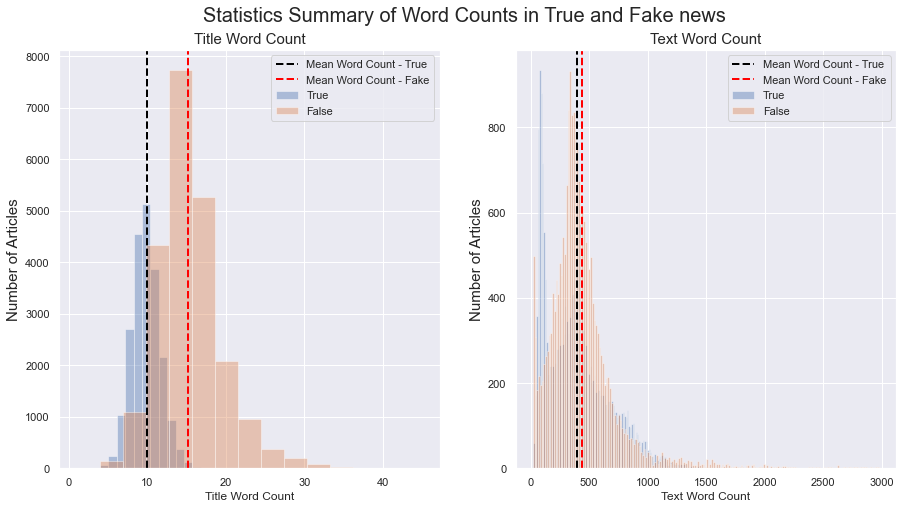

In [163]:
# After dropping the outliers and duplicated data, let's replot the distribution graph for visualization
plt.subplots(1,2, figsize = (15,7.5))
plt.subplots_adjust(top = 0.9)
plt.suptitle('Statistics Summary of Word Counts in True and Fake news', fontsize = 20)

# Plot graph for Title Word Count
plt.subplot(1,2,1)
sns.distplot(df_true['Title Word Count'], bins = 15, label = 'True', kde = False)
sns.distplot(df_fake['Title Word Count'], bins = 15, label = 'False', kde = False)
plt.title('Title Word Count',fontsize = 15)
#plt.xlabel('Word Count',fontsize = 15)
plt.ylabel('Number of Articles',fontsize = 15)
plt.axvline(x=df_true['Title Word Count'].mean(),
            linewidth = 2,
            linestyle = '--',
            color = 'black', label = 'Mean Word Count - True')
plt.axvline(x=df_fake['Title Word Count'].mean(),
            linewidth = 2,
            linestyle = '--',
            color = 'red', label = 'Mean Word Count - Fake')
plt.legend()

# Plot graph for Text Word Count
plt.subplot(1,2,2)
sns.distplot(df_true['Text Word Count'], bins = 200, label = 'True', kde = False)
sns.distplot(df_fake['Text Word Count'], bins = 200, label = 'False', kde = False)
plt.title('Text Word Count',fontsize = 15)
#plt.xlabel('Word Count',fontsize = 15)
plt.ylabel('Number of Articles',fontsize = 15)
plt.axvline(x=df_true['Text Word Count'].mean(),
            linewidth = 2,
            linestyle = '--',
            color = 'black', label = 'Mean Word Count - True')
plt.axvline(x=df_fake['Text Word Count'].mean(),
            linewidth = 2,
            linestyle = '--',
            color = 'red', label = 'Mean Word Count - Fake')
plt.legend();


In [164]:
# WordClouds for words in Titles for df_true
# Setting up or stopwords 
stopwords = set(STOPWORDS)

# Creating a list of words 
words_df_true_title = ''

# Iterating over every word in our column
for word in df_true['title']:

# Iterate over text and split it
    word = word.split()
    
    # Converting each word into lowercase using a for loop
    for i in range(len(word)):
                   word[i] = word[i].lower()
                   words_df_true_title += " ".join(word)+" "

# Intializing a Word Cloud 
wc_df_true_title = WordCloud(width = 500,
                                   height = 500,
                                   background_color = 'black',
                                   stopwords = stopwords).generate(words_df_true_title)

In [165]:
# WordClouds for words in Titles for df_fake
# Setting up or stopwords 
stopwords = set(STOPWORDS)

# Creating a list of words 
words_df_fake_title = ''

# Iterating over every word in our column
for word in df_fake['title']:

# Iterate over text and split it
    word = word.split()
    
    # Converting each word into lowercase using a for loop
    for i in range(len(word)):
                   word[i] = word[i].lower()
                   words_df_fake_title += " ".join(word)+" "

# Intializing a Word Cloud 
wc_df_fake_title = WordCloud(width = 500,
                                   height = 500,
                                   background_color = 'black',
                                   stopwords = stopwords).generate(words_df_fake_title)

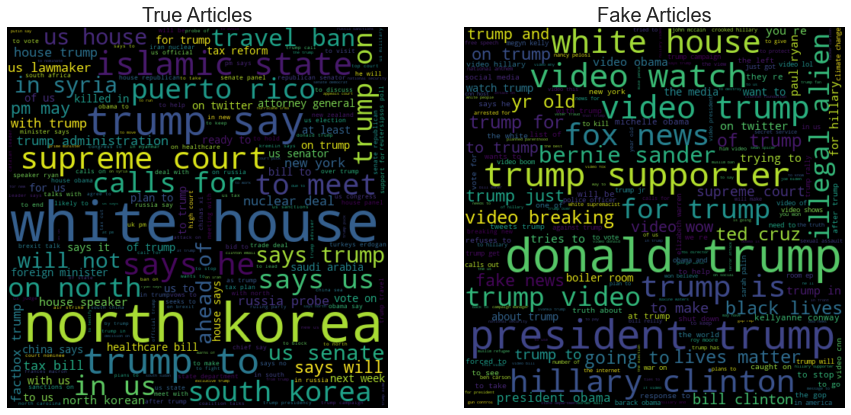

In [166]:
# plot the WordCloud image for News Title
# a good resource to guide doing subplot 
# https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html
# https://python-graph-gallery.com/261-custom-python-wordcloud/

plt.subplots(1,2, figsize = (15,15))
plt.subplots_adjust(top = 0.9)
#plt.suptitle('Word Cloud for Articles Title', fontsize = 20)

# WordCloud for True News DataFrame
plt.subplot(1,2,1)
plt.imshow(wc_df_true_title, interpolation="bilinear")
plt.title('True Articles', fontsize = 20)
plt.axis('off')

# WordCloud for Fake News DataFrame
plt.subplot(1,2,2)
plt.imshow(wc_df_fake_title, interpolation="bilinear")
plt.title('Fake Articles', fontsize = 20)
plt.axis('off')

plt.show();

In [ ]:
#print("Correctly clustered news: " + str((correct*100)/(correct+incorrect)) + "%")
#https://builtin.com/data-science/step-step-explanation-principal-component-analysis

## Articles published date analysis

In [167]:
# Converting date column data type from object to datetime
df_true['date'] = pd.to_datetime(df_true['date'])
df_fake['date'] = pd.to_datetime(df_fake['date'], errors = 'coerce')

# Converting date columns into year, month and day
# Extracting the year of publishing
df_true['Year'] = df_true['date'].dt.year
df_fake['Year'] = df_fake['date'].dt.year

# Extracting the month of the year
df_true['Month'] = df_true['date'].dt.month
df_fake['Month'] = df_fake['date'].dt.month

# Extracting the day of the month
df_true['Day'] = df_true['date'].dt.day
df_fake['Day'] = df_fake['date'].dt.day

In [168]:
# dataframe check
df_true.head()

,title,text,subject,date,category,Title Word Count,Text Word Count,Year,Month,Day
0,as us budget fight looms republicans flip thei...,washington reuters the head of a conservative...,Political News,2017-12-31,1,10,753,2017,12,31
1,us military to accept transgender recruits on ...,washington reuters transgender people will be...,Political News,2017-12-29,1,9,625,2017,12,29
2,senior us republican senator let mr mueller do...,washington reuters the special counsel invest...,Political News,2017-12-31,1,10,466,2017,12,31
3,fbi russia probe helped by australian diplomat...,washington reuters trump campaign adviser geo...,Political News,2017-12-30,1,9,377,2017,12,30
4,trump wants postal service to charge much more...,seattlewashington reuters president donald tr...,Political News,2017-12-29,1,11,864,2017,12,29


In [169]:
# data type check
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21202 entries, 0 to 21201
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             21202 non-null  object        
 1   text              21202 non-null  object        
 2   subject           21202 non-null  object        
 3   date              21202 non-null  datetime64[ns]
 4   category          21202 non-null  int64         
 5   Title Word Count  21202 non-null  int64         
 6   Text Word Count   21202 non-null  int64         
 7   Year              21202 non-null  int64         
 8   Month             21202 non-null  int64         
 9   Day               21202 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 1.6+ MB


In [170]:
# Double check the true dataframe has no NA
df_true.isna().sum()

title               0
text                0
subject             0
date                0
category            0
Title Word Count    0
Text Word Count     0
Year                0
Month               0
Day                 0
dtype: int64

In [171]:
# dataframe check
df_fake.head()

,title,text,subject,date,category,Title Word Count,Text Word Count,Year,Month,Day
0,donald trump sends out embarrassing new year’...,donald trump just couldn t wish all americans ...,News,2017-12-31,0,13,516,2017.0,12.0,31.0
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,News,2017-12-31,0,9,309,2017.0,12.0,31.0
2,sheriff david clarke becomes an internet joke...,on friday it was revealed that former milwauke...,News,2017-12-30,0,16,600,2017.0,12.0,30.0
3,trump is so obsessed he even has obama’s name...,on christmas day donald trump announced that h...,News,2017-12-29,0,15,475,2017.0,12.0,29.0
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,News,2017-12-25,0,12,434,2017.0,12.0,25.0


In [172]:
# data type check
# why year, month and day are float and not int?
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22300 entries, 0 to 22299
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             22300 non-null  object        
 1   text              22300 non-null  object        
 2   subject           22300 non-null  object        
 3   date              22299 non-null  datetime64[ns]
 4   category          22300 non-null  int64         
 5   Title Word Count  22300 non-null  int64         
 6   Text Word Count   22300 non-null  int64         
 7   Year              22299 non-null  float64       
 8   Month             22299 non-null  float64       
 9   Day               22299 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 1.7+ MB


In [173]:
# Double check the fake dataframe has no NA
df_fake.isna().sum()

title               0
text                0
subject             0
date                1
category            0
Title Word Count    0
Text Word Count     0
Year                1
Month               1
Day                 1
dtype: int64

In [174]:
df_fake.describe()

,category,Title Word Count,Text Word Count,Year,Month,Day
count,22300.0,22300.000000,22300.000000,22299.000000,22299.000000,22299.000000
mean,0.0,15.167220,437.036906,2016.292479,6.281851,15.494820
std,0.0,4.209956,306.268431,0.647634,3.384378,8.746523
min,0.0,1.000000,20.000000,2015.000000,1.000000,1.000000
25%,0.0,13.000000,271.000000,2016.000000,3.000000,8.000000
50%,0.0,15.000000,383.000000,2016.000000,6.000000,15.000000
75%,0.0,17.000000,525.000000,2017.000000,9.000000,23.000000
max,0.0,45.000000,2977.000000,2018.000000,12.000000,31.000000


In [175]:
# Since there is null values in the Fake Dataframe, these empty data need to be filled
# Median would be the option to use based on the 50% percentile from the described table 

df_fake['Year'] = df_fake['Year'].fillna(df_fake['Year'].median())

df_fake['Month'] = df_fake['Month'].fillna(df_fake['Year'].median())

df_fake['Day'] = df_fake['Day'].fillna(df_fake['Day'].median())

In [176]:
# reset dataframe index
df_true.reset_index(drop = True, inplace = True)
df_fake.reset_index(drop = True, inplace = True)

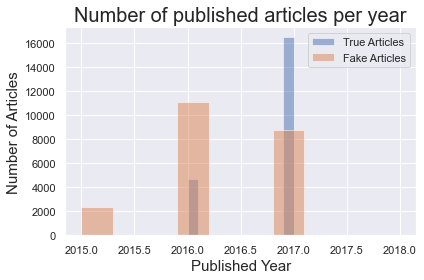

In [177]:
# Making our first subplot
plt.title('Number of published articles per year', fontsize = 20)
plt.hist(df_true['Year'], alpha = 0.5, label = 'True Articles')
plt.hist(df_fake['Year'], alpha = 0.5, label = 'Fake Articles')
plt.xlabel('Published Year', fontsize = 15)
plt.ylabel('Number of Articles', fontsize = 15)
plt.legend()
plt.tight_layout()
plt.show()

#### Brief conclusion

### Vectorization

Next step I would like compare the top 30 words used in the True and Fake News dataset, information will be extracted and put together in a DataFrame. 

To understand more about vectorization:

- **Towards Data Science:** https://towardsdatascience.com/natural-language-processing-count-vectorization-with-scikit-learn-e7804269bb5e

- **Kaggle:** https://www.kaggle.com/adamschroeder/countvectorizer-tfidfvectorizer-predict-comments

Here is a good examples of how to setup the syntax:

- **Stack overflow:** https://stackoverflow.com/questions/55994883/how-to-use-countvectorizer-to-test-new-data-after-doing-some-training

In [180]:
%%time 
# Setting up our variables
true_text = df_true['text']
fake_text = df_fake['text']

# Call for the vectorizer model
vect_true = CountVectorizer(stop_words = 'english')
vect_fake = CountVectorizer(stop_words = 'english')

# Fit and transform the Vectorizer for the two data set
# side note to myself: always set variable for 'fit_transform'
true_text = vect_true.fit_transform(true_text)
fake_text = vect_fake.fit_transform(fake_text)

#vect_true.fit(true_text)
#vect_fake.fit(fake_text)

print('Time taken to vectorize:')

Time taken to vectorize:
CPU times: user 15.9 s, sys: 295 ms, total: 16.2 s
Wall time: 16.3 s


After vectorization, I would like to place the output DataFrame side-by-side for comparison. Here is a good example for further instructions:

**Stack overflow:** https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side

In [181]:
# Exact and conclude results in a DataFrame format
df_vect_true = pd.DataFrame(columns=vect_true.get_feature_names(), data=true_text.toarray())

df_vect_fake = pd.DataFrame(columns=vect_fake.get_feature_names(), data=fake_text.toarray())

In [69]:
#df_vect_true.head()

In [70]:
#df_vect_fake.head()

In [182]:
# Create word count variable
word_count = 30

# Create dataframe and adds up across axis 0 to get the count of words
df_true_wordcount = pd.DataFrame(df_vect_true.sum(axis = 0).reset_index())
df_fake_wordcount = pd.DataFrame(df_vect_fake.sum(axis = 0).reset_index())

# Rename the columns
df_true_wordcount.columns = ['Word', 'Word Count']
df_fake_wordcount.columns = ['Word', 'Word Count']

# Reset the index for this new dataframe
df_true_wordcount.reset_index(inplace = True, drop = True)
df_fake_wordcount.reset_index(inplace = True, drop = True)

# Getting the top 20 words in a descending order
top_30_true = df_true_wordcount.sort_values(by = 'Word Count', ascending = False).head(word_count)
top_30_fake = df_fake_wordcount.sort_values(by = 'Word Count', ascending = False).head(word_count)

# Getting the bottom 20 words for both
#bottom_30_true = true_word_count_df.sort_values(by = 'Word Count', ascending = True).head(20)
#bottom_30_fake = fake_word_count_df.sort_values(by = 'Word Count', ascending = True).head(20)

In [183]:
from IPython.display import display_html
# Defining function
def display(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
    

# Display the 2 DataFrame side-by-side for comparision
display(top_30_true, top_30_fake)

,Word,Word Count
58211,said,97731
69098,trump,53584
56413,reuters,28050
52105,president,26063
63654,state,19507
27012,government,18006
45170,new,16598
30458,house,16373
63725,states,16371
70575,united,15330


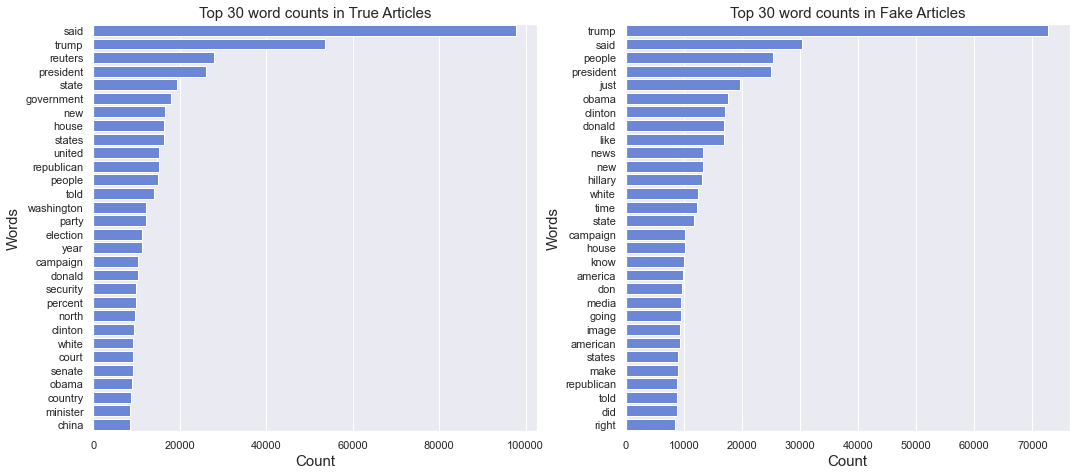

In [184]:
# To Summarize the two DataFrame into a histograph
plt.subplots(1,2, figsize = (17.5,7.5))

plt.subplot(1,2,1)
sns.barplot(x='Word Count', y='Word', data=top_30_true, color='#597FE7')
plt.title('Top 30 word counts in True Articles',fontsize = 15)
plt.xlabel('Count',fontsize = 15)
plt.ylabel('Words',fontsize = 15)

plt.subplot(1,2,2)
sns.barplot(x='Word Count', y='Word', data=top_30_fake, color='#597FE7')
plt.title('Top 30 word counts in Fake Articles',fontsize = 15)
plt.xlabel('Count',fontsize = 15)
plt.ylabel('Words',fontsize = 15);

In [185]:
# To create a new stopwords list, I compare the above 2 charts for overlapped words and added to the stopwords list
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwordslist = list(stopwords)
stopwordslist.extend(('said','trump','reuters','president','state','government','states','new','house','united',
                       'clinton','obama','donald','like','news','just', 'campaign', 'washington', 'election',
                        'party', 'republican', 'image', 'just'))

# Chck if the words were added to the list
print(stopwordslist)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/queeniehu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [186]:
df_true['category'] = 1
df_fake['category'] = 0

In [187]:
concat_tf = pd.concat([df_true, df_fake])
concat_tf.reset_index(drop = True, inplace = True)
concat_tf.head()

,title,text,subject,date,category,Title Word Count,Text Word Count,Year,Month,Day
0,as us budget fight looms republicans flip thei...,washington reuters the head of a conservative...,Political News,2017-12-31,1,10,753,2017.0,12.0,31.0
1,us military to accept transgender recruits on ...,washington reuters transgender people will be...,Political News,2017-12-29,1,9,625,2017.0,12.0,29.0
2,senior us republican senator let mr mueller do...,washington reuters the special counsel invest...,Political News,2017-12-31,1,10,466,2017.0,12.0,31.0
3,fbi russia probe helped by australian diplomat...,washington reuters trump campaign adviser geo...,Political News,2017-12-30,1,9,377,2017.0,12.0,30.0
4,trump wants postal service to charge much more...,seattlewashington reuters president donald tr...,Political News,2017-12-29,1,11,864,2017.0,12.0,29.0


In [188]:
concat_tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43502 entries, 0 to 43501
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             43502 non-null  object        
 1   text              43502 non-null  object        
 2   subject           43502 non-null  object        
 3   date              43501 non-null  datetime64[ns]
 4   category          43502 non-null  int64         
 5   Title Word Count  43502 non-null  int64         
 6   Text Word Count   43502 non-null  int64         
 7   Year              43502 non-null  float64       
 8   Month             43502 non-null  float64       
 9   Day               43502 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 3.3+ MB


In [189]:
concat_tf.shape

(43502, 10)

In [190]:
# save new CSV data file
concat_tf.to_csv('data/concat_tf.csv')

To summarize, the following changes have been made on my dataset before moving forward:

1. Dropped duplicated data
2. Fill in missing data based on the DataFrame description
3. Rename subject column
4. Ensure the data in both data sets are balanced
5. Performed analyses including news subject distribution and date published distribution
6. Analysed, visualized and compared Top words used in the articles Title and Text
7. Categorized True and Fake news to 1 and 0, respectively
8. Combined dataframe for further analysis and data modelling
9. Create a new CSV file for the cleaned data